In [1]:
#SCRIPT PARA ANÁLISE BÁSICA DOS DADOS DE CANDIDATOS(AS) A VEREADOR(A) NO TERRITÓRIO NACIONAL
#DATASET OBTIDO DO REPOSITÓRIO DE DADOS ABERTOS DO TRIBUNAL SUPERIOR ELEITORAL
#DATASET HOSPEDADO NO GITHUB PARA FACILITAR IMPORTAÇÃO

#COMO USAR:
#Clique em "Run" e informe sua cidade com caracteres acentuados caso houver. Informe também o estado

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
ufs_norte = ['AC','AM','AP','PA','RO','RR','TO']
ufs_nordeste = ['AL','BA','CE','MA','PB','PE','PI','RN','SE']
ufs_centro_oeste = ['GO','MS','MT'] #sem DF porque não elege vereadores
ufs_sudeste = ['ES','MG','RJ','SP']
ufs_sul = ['PR','RS','SC']
prefixo = 'https://raw.githubusercontent.com/elmoneto/analise-dados-tse/master/vereadores-2020/dataset/consulta_cand_2020_'

In [4]:
cidade = input('Informe o nome da cidade: ').upper()
estado = input('Informe a sigla do estado: ').upper()

Informe o nome da cidade: santa maria
Informe a sigla do estado: rs


In [5]:
arquivo = prefixo + estado + '.csv'
dados = pd.read_csv(arquivo, sep=';', encoding="latin_1")

In [6]:
dados = dados.query("NM_UE == '{}' & SG_UF == '{}'".format(cidade,estado))
#print(dados[["NM_CANDIDATO","SG_UF"]])

In [7]:
rotulos_instrucao = dados["DS_GRAU_INSTRUCAO"].unique().tolist()
df_instrucao_masculino = dados.query("DS_GENERO == 'MASCULINO'")
df_instrucao_feminino = dados.query("DS_GENERO == 'FEMININO'")
s_instrucao_masculino = df_instrucao_masculino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()
s_instrucao_feminino = df_instrucao_feminino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()

for item in rotulos_instrucao:
    if item not in s_instrucao_feminino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_feminino = s_instrucao_feminino.append(s)
        
for item in rotulos_instrucao:
    if item not in s_instrucao_masculino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_masculino = s_instrucao_masculino.append(s)        

index_instrucao= ['SUPERIOR COMPLETO','SUPERIOR INCOMPLETO','ENSINO MÉDIO COMPLETO','ENSINO MÉDIO INCOMPLETO',
             'ENSINO FUNDAMENTAL COMPLETO','ENSINO FUNDAMENTAL INCOMPLETO','LÊ E ESCREVE']
s_instrucao_masculino = s_instrucao_masculino.reindex(index_instrucao)
s_instrucao_feminino = s_instrucao_feminino.reindex(index_instrucao)

l_instrucao_masculino = []
l_instrucao_feminino = []
for item in s_instrucao_masculino:
    percent = round(item*100 / s_instrucao_masculino.sum(),1)
    l_instrucao_masculino.append(percent)
for item in s_instrucao_feminino:
    percent = round(100*item / s_instrucao_feminino.sum(),1)
    l_instrucao_feminino.append(percent)


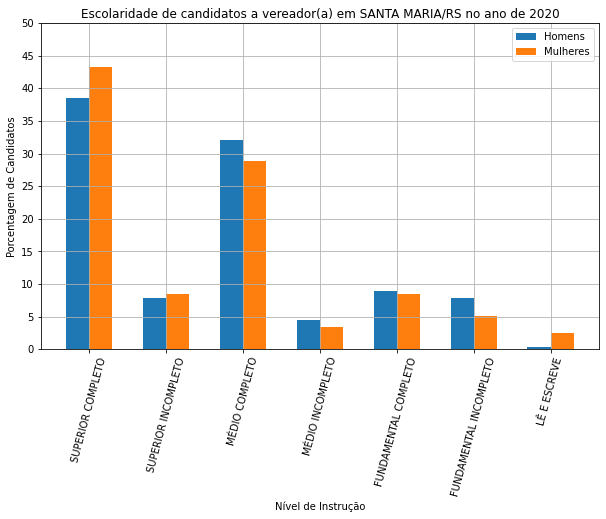

In [13]:
rotulos = []
for index in index_instrucao:
    rotulos.append(index.replace("ENSINO ",""))
x = np.arange(len(index_instrucao))
y = np.arange(0,max([max(l_instrucao_masculino),max(l_instrucao_feminino)])+10,5)
largura = 0.30 
fig, ax = plt.subplots()
rects1 = ax.bar(x - largura/2, l_instrucao_masculino, largura, label='Homens')
rects2 = ax.bar(x + largura/2, l_instrucao_feminino, largura, label='Mulheres')
ax.set_ylabel('Porcentagem de Candidatos')
ax.set_xlabel('Nível de Instrução')
ax.set_title('Escolaridade de candidatos a vereador(a) em {}/{} no ano de 2020'.format(cidade,estado))
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(rotulos)
plt.xticks(rotation=75)
ax.legend()
plt.grid()
fig.set_figheight(6)
fig.set_figwidth(10)


Identificação de gênero dos(as) candidatos(as)
MASCULINO    244
FEMININO     118
Name: DS_GENERO, dtype: int64


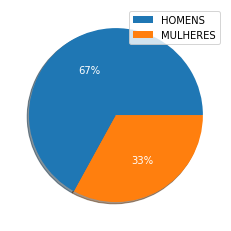

In [14]:
s_genero = dados["DS_GENERO"].value_counts()
print("Identificação de gênero dos(as) candidatos(as)")
print(s_genero)
l_genero_percent = []
l_genero_percent.append(round(s_genero["MASCULINO"]*100 / s_genero.sum(),0))
l_genero_percent.append(round(s_genero["FEMININO"]*100 / s_genero.sum(),0))
plt.pie(x=l_genero_percent,labels=["HOMENS","MULHERES"],autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

Identificação Racial dos(as) Candidatos(as)
BRANCA    303
PRETA      33
PARDA      26
Name: DS_COR_RACA, dtype: int64


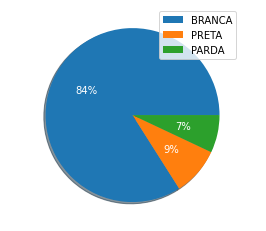

In [15]:
rotulos_raca = dados["DS_COR_RACA"].unique()
print("Identificação Racial dos(as) Candidatos(as)")
s_raca = dados["DS_COR_RACA"].value_counts()
print(s_raca)
l_raca_percent = []

for item in rotulos_raca:
    l_raca_percent.append(round( s_raca[item]*100 / s_raca.sum(),0))

plt.pie(x=l_raca_percent,labels=rotulos_raca,autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

In [18]:
print("20 profissões mais comuns entre os(as) candidatos(as)\n")
print(dados["DS_OCUPACAO"].value_counts().head(20))

20 profissões mais comuns entre os(as) candidatos(as)

OUTROS                                                      77
EMPRESÁRIO                                                  34
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                        19
ADVOGADO                                                    19
PROFESSOR DE ENSINO MÉDIO                                   11
ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS              11
VEREADOR                                                    10
DONA DE CASA                                                 9
MILITAR REFORMADO                                            8
MÉDICO                                                       7
SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA              6
TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)     6
CABELEIREIRO E BARBEIRO                                      6
SERVIDOR PÚBLICO MUNICIPAL                                   6
VIGILANTE                                                    6
